In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/var/folders/xk/0pfb24315clcz5hhv8f69q5c0000gp/T/ipykernel_36157/2565697472.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
x1 = np.linspace(0,5,25)
x2 = np.linspace(0,5,25)
X1,X2 = np.meshgrid(x1,x2)
y = np.zeros((25,25))
for i in range(15,25):
  for j in range(15,25):
    y[i,j] = 1

https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

In [3]:
X1.shape

(25, 25)

In [4]:
import pandas as pd
df = pd.DataFrame((X1.ravel()), columns = ["x1"])
df.head()

,x1
0,0.000000
1,0.208333
2,0.416667
3,0.625000
4,0.833333


In [5]:
df["x2"] = X2.ravel()
df["y"] = y.ravel()

In [6]:
df.head()

,x1,x2,y
0,0.000000,0.0,0.0
1,0.208333,0.0,0.0
2,0.416667,0.0,0.0
3,0.625000,0.0,0.0
4,0.833333,0.0,0.0


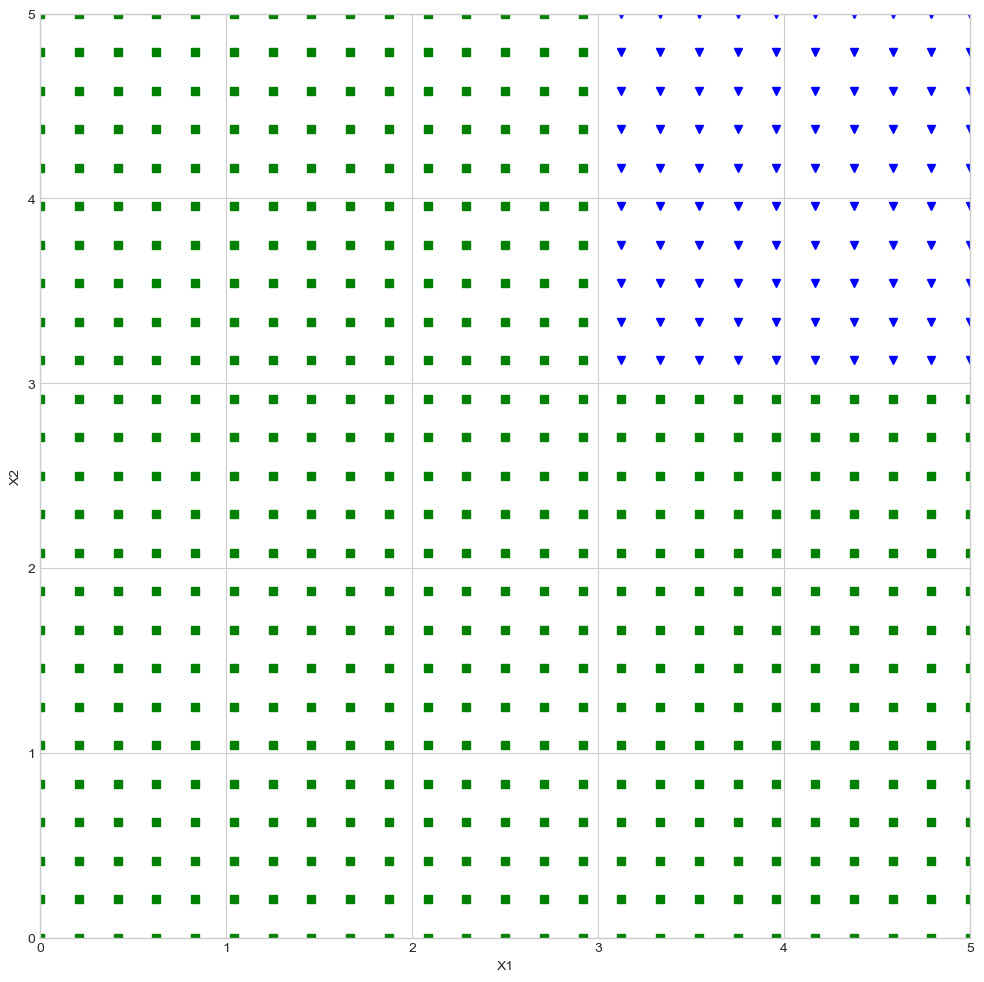

In [7]:
plt.figure(figsize=(12,12))
plt.plot(df["x1"][df["y"] == 0],df["x2"][df["y"] == 0], "sg")
plt.plot(df["x1"][df["y"] == 1],df["x2"][df["y"] == 1], "vb")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis([0,5,0,5])
plt.show()

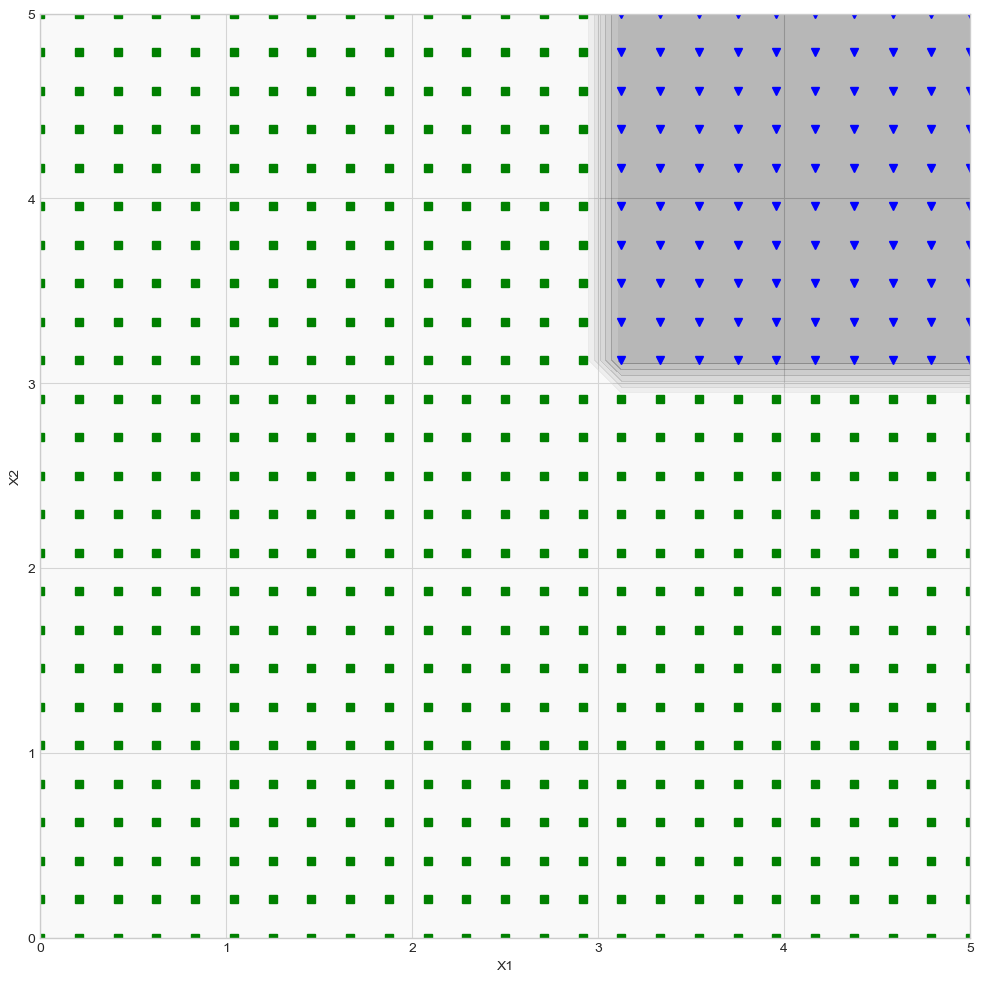

In [8]:
plt.figure(figsize=(12,12))
X = np.column_stack([X1.ravel(),X2.ravel()])
Y = y.ravel()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42, max_depth = 2)
tree.fit(X,Y)
y_pred = tree.predict(X).reshape(X1.shape)
plt.contourf(X1,X2,y_pred,cmap = "binary",alpha = 0.3)
#plt.colorbar()
plt.plot(df["x1"][df["y"] == 0],df["x2"][df["y"] == 0], "sg") # hue = y
plt.plot(df["x1"][df["y"] == 1],df["x2"][df["y"] == 1], "vb")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis([0,5,0,5])
plt.show()

In [9]:
import seaborn as sns

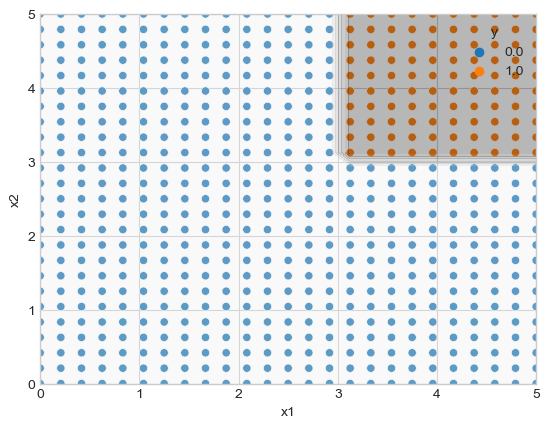

In [10]:
sns.scatterplot(x="x1",y="x2",hue="y",data=df)
plt.contourf(X1,X2,y_pred,cmap = "binary",alpha = 0.3)
plt.show()

In [11]:
df["x1"][df["y"] == 0]

0      0.000000
1      0.208333
2      0.416667
3      0.625000
4      0.833333
         ...   
610    2.083333
611    2.291667
612    2.500000
613    2.708333
614    2.916667
Name: x1, Length: 525, dtype: float64

In [12]:
df["y"] == 0

0       True
1       True
2       True
3       True
4       True
       ...  
620    False
621    False
622    False
623    False
624    False
Name: y, Length: 625, dtype: bool

In [13]:
df["x1"][df["y"] == 0]

0      0.000000
1      0.208333
2      0.416667
3      0.625000
4      0.833333
         ...   
610    2.083333
611    2.291667
612    2.500000
613    2.708333
614    2.916667
Name: x1, Length: 525, dtype: float64

In [14]:
#Exporting the Decision Tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
export_graphviz(tree,
               out_file = "clf_tree.odt",
               feature_names = ["x1","x2"],
               filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file("clf_tree.odt")
chd_tree_graph.write_jpg("chd_tree_gini.png")
Image(filename = "chd_tree_gini.png")

In [ ]:
X,y = make_moons(n_samples=1000, noise = 0.1, random_state = 10)

In [ ]:
plt.plot(X[:,0][y==1],X[:,1][y==1], "sg", label = "1")
plt.plot(X[:,0][y==0],X[:,1][y==0], "^r", label = "0")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

In [ ]:
#Exporting the Decision Tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier

In [ ]:
export_graphviz(tree_clf,
               out_file = "clf_tree.odt",
               feature_names = ["x1","x2"],
               filled = True)

In [ ]:
chd_tree_graph = pdot.graphviz.graph_from_dot_file("clf_tree.odt")

In [ ]:
chd_tree_graph.write_jpg("chd_tree_gini.png")
Image(filename = "chd_tree_gini.png")

In [ ]:
x1 = np.linspace(-1.5,2.5,100)
x2 = np.linspace(-1,1.5,100)
X1,X2 = np.meshgrid(x1,x2)

In [ ]:
tree_clf.get_depth()

In [ ]:
X_test = np.column_stack((X1.ravel(),X2.ravel()))
y_pred = tree_clf.predict(X_test).reshape(X1.shape)
plt.plot(X[:,0][y==1],X[:,1][y==1], "sg", label = "1")
plt.plot(X[:,0][y==0],X[:,1][y==0], "^r", label = "0")
plt.contourf(X1,X2,y_pred,cmap = "binary", alpha = 0.3)
plt.title("Decision Tree with depth :{} ".format(tree_clf.get_depth()))
plt.colorbar()
plt.legend()
plt.show()

In [ ]:
def plot_predictions(model):
  x1 = np.linspace(-2,3,100)
  x2 = np.linspace(-1,1.5,100)
  X1,X2 = np.meshgrid(x1,x2)
  X_test = np.column_stack((X1.ravel(),X2.ravel()))
  y_pred = model.predict(X_test).reshape(X1.shape)
  plt.contourf(X1,X2,y_pred,cmap = "viridis", alpha = 0.3)
  plt.title("Decision Bounndry with depth : {0}".format(model.get_depth()))
  plt.colorbar()

In [ ]:
def create_plot():
  plt.plot(X[:,0][y==1],X[:,1][y==1], "sg", label = "1")
  plt.plot(X[:,0][y==0],X[:,1][y==0], "^r", label = "0")
  plt.legend()

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

In [ ]:
tree_clf.get_depth()

In [ ]:
plot_predictions(tree_clf)
create_plot()
plt.show()

In [ ]:
X,y = make_moons(n_samples=100, noise = 0.3, random_state = 10)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X,y)
plot_predictions(tree_clf)
create_plot()
plt.title("Without Restrictions")
plt.show()

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42,min_samples_leaf=7)
tree_clf.fit(X,y)
plot_predictions(tree_clf)
create_plot()
plt.title("min_samples_leaf=7")
plt.show()

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X,y)
plot_predictions(tree_clf)
create_plot()
plt.show()

# Implementing on the data

In [ ]:
#Load the data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
#Separate the input features and target
X = cancer.data
y = cancer.target

In [ ]:
X.shape

In [ ]:
#Split into Train & Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
clf_tree.fit(X_train,y_train)

In [ ]:
y_pred = clf_tree.predict(X_test)

In [ ]:
export_graphviz(clf_tree,
               out_file = "clf_tree.odt",
               feature_names = cancer.feature_names,
                class_names = cancer.target_names,
               filled = True)

In [ ]:
clf_tree_graph = pdot.graphviz.graph_from_dot_file("clf_tree.odt")

In [ ]:
clf_tree_graph.write_jpg("clf_tree.jpeg")
Image(filename = "clf_tree.jpeg")

In [ ]:
clf_tree.get_depth()

In [ ]:
from sklearn.metrics import roc_auc_score
y_train_pred = clf_tree.predict(X_train)
roc_auc_score(y_train,y_train_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_tree,X_train,y_train, cv = 5, scoring = "roc_auc")

In [ ]:
np.mean(cross_val_score(clf_tree,X_train,y_train, cv = 3, scoring = "roc_auc"))

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf_tree,X_train,y_train, cv = 5)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{"max_depth" : range(2,8),
               "min_samples_leaf": range(3,10),
               "max_leaf_nodes":range(5,15)}]

clf_tree = DecisionTreeClassifier(random_state = 42)

clf = GridSearchCV(clf_tree,
                  parameters,
                  cv = 5,
                  scoring = "roc_auc")

clf.fit(X_train,y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
from sklearn.base import clone
best_tree = clone(clf.best_estimator_)

In [ ]:
best_tree.fit(X_train,y_train)

In [ ]:
best_tree = DecisionTreeClassifier(random_state = 42,
                                   max_depth = 3,
                                   max_leaf_nodes=7,
                                   min_samples_leaf=8)
best_tree.fit(X_train,y_train)

In [ ]:
cross_val_score(clf,X_train,y_train,scoring="roc_auc",cv = 5)

In [ ]:
np.mean(cross_val_score(best_tree,X_train,y_train,scoring="roc_auc",cv = 5))

In [ ]:
y_pred_test = best_tree.predict(X_test)
roc_auc_score(y_test,y_pred_test)

In [ ]:
#Create ODT file

export_graphviz(best_tree,
               out_file = "best_tree.odt",
               feature_names = cancer.feature_names,
                class_names = cancer.target_names,
               filled = True)

#Generate the Graph
clf_tree_graph = pdot.graphviz.graph_from_dot_file("best_tree.odt")

#Writing to a jpeg file
clf_tree_graph.write_jpg("best_tree.jpeg")

#Displaying the Image
Image(filename = "best_tree.jpeg")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
y_pred_train = cross_val_predict(best_tree,X_train,y_train,cv=5)

In [ ]:
cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot = True, fmt = ".2f",
            xticklabels=["Malignant","Benign"],
            yticklabels=["Malignant","Benign"] )
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot = True, fmt = ".2f",
            xticklabels=["Malignant","Benign"],
            yticklabels=["Malignant","Benign"] )
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
plt.matshow(cm,cmap = "viridis")


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{"criterion" : ["gini","entropy"],
                    "max_depth" : range(2,20)}]

clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                  tuned_parameters,
                  cv = 10,
                  scoring = "roc_auc")

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
#final fit
clf_tree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf_tree.fit(X_train,y_train)

In [ ]:
y_pred = clf_tree.predict(X_test)

In [ ]:
export_graphviz(clf_tree,
               out_file = "final_tree.odt",
               feature_names = cancer.feature_names,
                class_names = cancer.target_names,
               filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file("final_tree.odt")
chd_tree_graph.write_jpg("final_tree.png")
Image(filename = "final_tree.png")